## _*BeH2 plots of various orbital reduction results*_

We have notebooks showing LiH, where we often remove (discard) two unoccupied orbitals, in addition to freezing the core. While freezing of the core electrons can always be done, discarding unoccupied orbitals should be done with great care.

This notebook demonstrates this for Beryllium Dihydride (BeH2) where we show the effect of removing different unoccupied orbitals. We use Qiskit Chemistry to plot graphs of the ground state energy of the Beryllium Dihydride (BeH2) molecule over a range of inter-atomic distances using ExactEigensolver. Freeze core reduction is true and different virtual orbital removals are tried as a comparison.

This notebook has been written to use the PYSCF chemistry driver.

In [5]:
import numpy as np
import pylab
from qiskit.aqua.algorithms import ExactEigensolver
from qiskit.chemistry.drivers import PySCFDriver
from qiskit.chemistry.core import Hamiltonian, QubitMappingType

molecule = 'H .0 .0 -{0}; Be .0 .0 .0; H .0 .0 {0}'
#reductions = [[-3, -2], []]

reductions = [[-3, -2]]
#pts  = [x * 0.1  for x in range(6, 20)]
#pts += [x * 0.25 for x in range(8, 16)]
#pts += [4.0]
pts = [1.7]
energies = np.empty([len(reductions), len(pts)])
distances = np.empty(len(pts))

f = open('BeH2_with_IIIIII.txt', 'w')
print('Processing step __', end='')
for i, d in enumerate(pts):
    print('\b\b{:2d}'.format(i), end='', flush=True)
    for j in range(len(reductions)):
        driver = PySCFDriver(molecule.format(d), basis='sto3g')
        qmolecule = driver.run()
        operator =  Hamiltonian(qubit_mapping=QubitMappingType.PARITY,
                                two_qubit_reduction=True, freeze_core=True,
                                orbital_reduction=reductions[j])
        qubit_op, aux_ops = operator.run(qmolecule)
        A = qubit_op.print_details()
        #print(A)
        print(A, file=f) 
        #print(A)
        result = ExactEigensolver(qubit_op).run()
        lines, result = operator.process_algorithm_result(result)
        print(lines)
        energies[j][i] = result['energy']
    distances[i] = d
print(' --- complete')
f.close()

print('Distances: ', distances)
print('Energies:', energies)


Processing step  0['=== GROUND STATE ENERGY ===', ' ', '* Electronic ground state energy (Hartree): -18.127177676099', '  - computed part:      -3.442305746953', '  - frozen energy part: -14.684871929146', '  - particle hole part: 0.0', '~ Nuclear repulsion energy (Hartree): 2.6458860546', '> Total ground state energy (Hartree): -15.481291621499']
 --- complete
Distances:  [1.7]
Energies: [[-15.48129162]]


First we plot the ground state energy against interatomic distance for the set of reductions

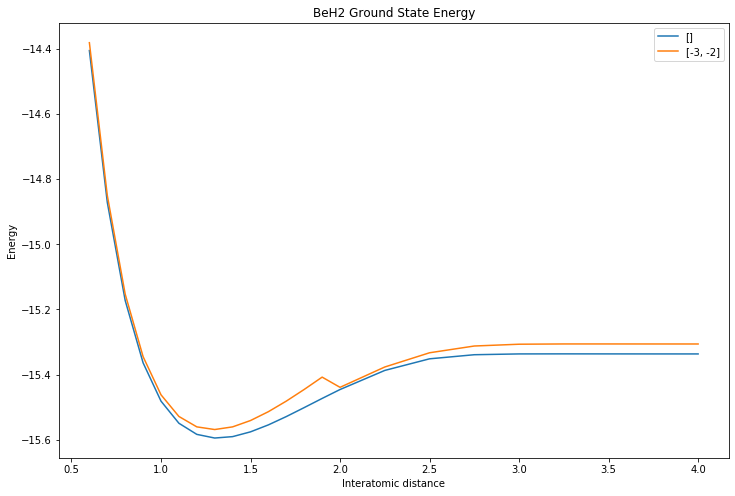

In [18]:
pylab.rcParams['figure.figsize'] = (12, 8)
for j in range(len(reductions)):
    pylab.plot(distances, energies[j], label=reductions[j])
pylab.xlabel('Interatomic distance')
pylab.ylabel('Energy')
pylab.title('BeH2 Ground State Energy')
pylab.legend(loc='upper right');

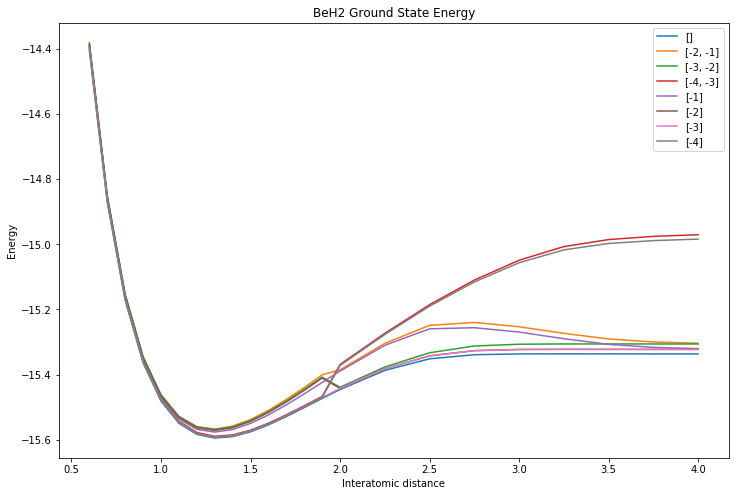

In [2]:
pylab.rcParams['figure.figsize'] = (12, 8)
for j in range(len(reductions)):
    pylab.plot(distances, energies[j], label=reductions[j])
pylab.xlabel('Interatomic distance')
pylab.ylabel('Energy')
pylab.title('BeH2 Ground State Energy')
pylab.legend(loc='upper right');

Now the difference in energy, compared to no reduction, is plotted so it is easier to see the effect. First in one larger plot so its easier to compare, and then in individual plots.

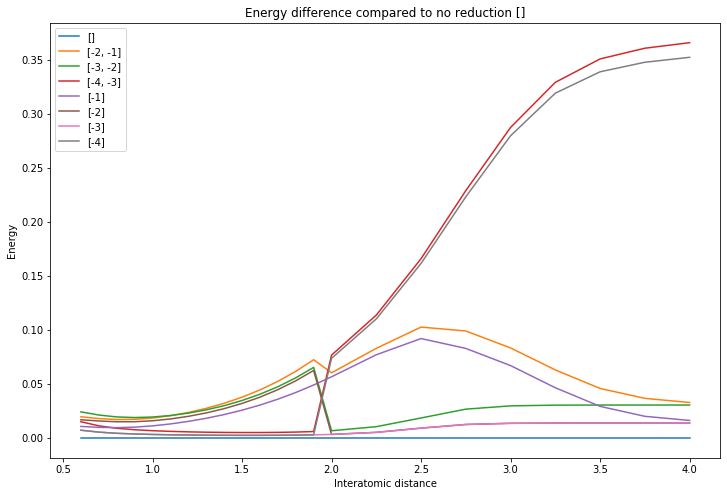

In [3]:
pylab.rcParams['figure.figsize'] = (12, 8)
for j in range(len(reductions)):
    pylab.plot(distances, np.subtract(energies[j], energies[0]), label=reductions[j])
pylab.xlabel('Interatomic distance')
pylab.ylabel('Energy')
pylab.title('Energy difference compared to no reduction []')
pylab.legend(loc='upper left');

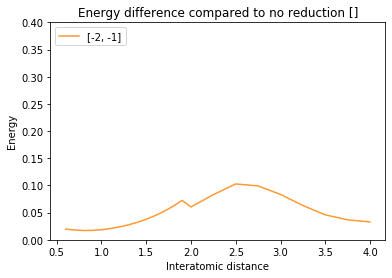

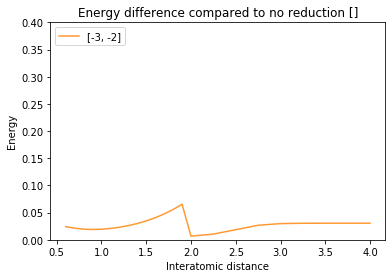

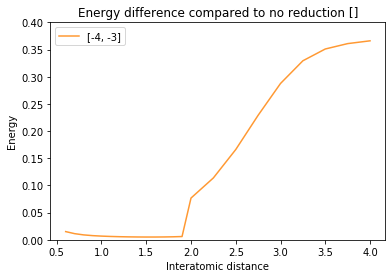

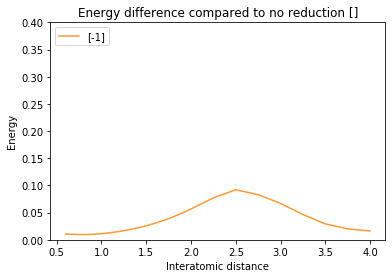

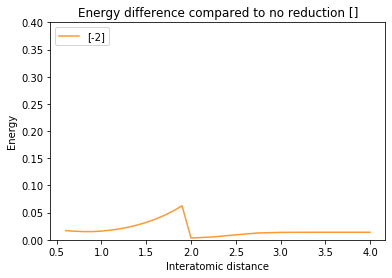

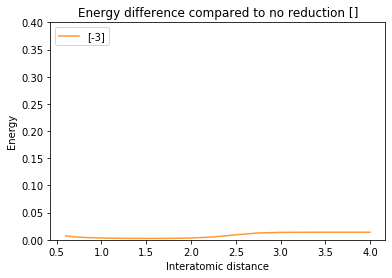

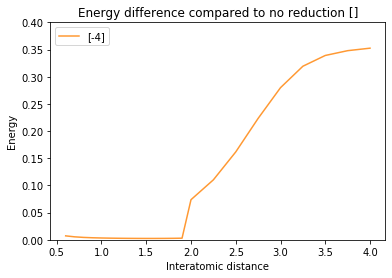

In [4]:
pylab.rcParams['figure.figsize'] = (6, 4)
for j in range(1, len(reductions)):
    pylab.plot(distances, np.subtract(energies[j], energies[0]), color=[1.0, 0.6, 0.2],
               label=reductions[j])
    pylab.ylim(0, 0.4)
    pylab.xlabel('Interatomic distance')
    pylab.ylabel('Energy')
    pylab.title('Energy difference compared to no reduction []')
    pylab.legend(loc='upper left')
    pylab.show()

#### Frozen core

At the start it was stated that freeze core could always be done. Here we do the computation without freezing the core, with no virtual orbitals removed, so we can compare to the same above where frozen core was used.

In [ ]:
e_nofreeze = np.empty(len(pts))
for i, d in enumerate(pts):
    print('\b\b{:2d}'.format(i), end='', flush=True)
    driver = PySCFDriver(molecule.format(d), basis='sto3g')
    qmolecule = driver.run()
    operator =  Hamiltonian(qubit_mapping=QubitMappingType.PARITY,
                            two_qubit_reduction=True, freeze_core=False,
                            orbital_reduction=[])
    qubit_op, aux_ops = operator.run(qmolecule)
    result = ExactEigensolver(qubit_op).run()
    lines, result = operator.process_algorithm_result(result)
    e_nofreeze[i] = result['energy']

print(e_nofreeze)

We plot the energy with and without frozen core; the one line covers the other as they are almost identical. Plotting the energy difference we can see how small the delta is between freezing the core or not.

In [ ]:
pylab.rcParams['figure.figsize'] = (8, 6)
pylab.plot(distances, energies[0], label='Freeze Core: True')
pylab.plot(distances, e_nofreeze, label='Freeze Core: False')
pylab.xlabel('Interatomic distance')
pylab.ylabel('Energy')
pylab.title('Energy difference, no reduction [], freeze core true/false')
pylab.legend(loc='upper right')
pylab.show()
pylab.title('Energy difference of freeze core True from False')
pylab.plot(distances, np.subtract(energies[0], e_nofreeze), label='Freeze Core: False')
pylab.show()